# Create a growing time series GIF using Matplotlib

* read in data using xarray
* extract data from a region of interest
* define animation function
* call animator
* save animation as a GIF image

This example uses data from the ACCESS-CM2 model output prepared for CMIP6. For more information about this collection, please visit the [NCI data catalogue](https://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f1481_6421_2540_3569) and note the terms of use.
   
---

- Authors: NCI Virtual Research Environment Team
- Keywords: CMIP, Matplotlib, animation
- Create Date: Feb-2021
---

This notebook is licenced under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/)

In [1]:
### import Python libraries

import xarray as xr
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np
import os

In [2]:
### define data file of interest and open using xarray
data_file='/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gn/files/d20191108/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc'

f = xr.open_dataset(data_file)

Note: If you wanted to run this example on your local machine, you could access the equivalent file using NCI's OPeNDAP service end point: 

http://dapds00.nci.org.au/thredds/dodsC/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gn/latest/tas_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.html

In [3]:
### query file metadata

f

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 144, lon: 192, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-11-08T06:41:46Z
    data_specs_version:     01.00.30
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARCCSS...
    grid:                   native atmosphere N96 grid (144x192 latxlon)
    grid_label:             gn
    history:                2019-11-08T06:41:46Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            CSIRO (Commonwealth Scientific and Industrial Res...
    institution_id:         CSIRO-ARCCSS
    mip_era:                CMIP6
    nominal_resolution:     250 km
    notes:                  Exp: CM2-historical; Local ID: bj594; Variable: t...
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       ACCESS-CM2
    parent_time_units:      days since 0950-01-01
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    run_variant:            forcing: GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2,...
    source:                 ACCESS-CM2 (2019): \naerosol: UKCA-GLOMAP-mode\na...
    source_id:              ACCESS-CM2
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(30 April 2019) MD5:e14f55f257cceaf...
    title:                  ACCESS-CM2 output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/d893128b-e107-4dcc-b543-46c77896f295
    license:                CMIP6 model data produced by CSIRO is licensed un...

Let's spatially subset our dataset to gather timeseris of the variable `tas` over the Canberra region:

In [4]:
timeseries = f.tas.sel(lon=149.13,lat=-35.28,method='nearest')
timeseries

<xarray.DataArray 'tas' (time: 1980)>
array([293.04175, 295.11548, 288.9922 , ..., 286.03198, 291.96948, 292.7815 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    lat      float64 -35.62
    lon      float64 149.1
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-08T06:41:45Z altered by CMOR: Treated scalar dime...

Now we can define x and y based on our timeseries subset, which will be used for our final animation

In [5]:
x = range(1, len(timeseries.time)+1)
y = timeseries.values

Finally, let's define our animation and create our GIF file:

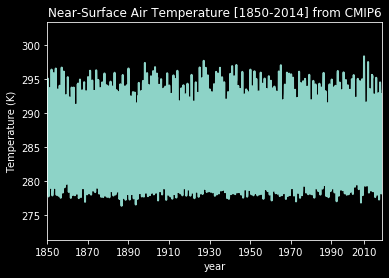

In [6]:
### set up figure
plt.style.use('dark_background')
fig = plt.figure() 
ax = plt.axes(xlim=(1, len(x)), ylim=(min(y)-5,max(y)+5)) 
line, = ax.plot([], [], lw=2) 

### define initialisation function 
def init(): 
    ### creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

### define lists to store x and y axis points 
xdata, ydata = [], [] 

### define animation function 
def animate(i): 

    ### x and y values to be plotted 
    x1 = x[i] 
    y1 = y[i] 

   ### appending new points to x1, y1 axiss points list 
    xdata.append(x1) 
    ydata.append(y1) 
    line.set_data(xdata, ydata) 
    return line, 

### setting a title for the plot 
plt.title('Near-Surface Air Temperature [1850-2014] from CMIP6') 
### defining the axis details 
plt.axis('on') 
plt.ylabel('Temperature (K)')
plt.xlabel('year')
plt.xticks([0,240,480,720,960,1200,1440,1680,1872], 
           ['1850', '1870', '1890','1910','1930','1950','1970','1990','2010'])

### call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
							frames=len(x), interval=20, blit=True) 

### create output directory
outdir = './output'
if not os.path.exists(outdir):
    os.mkdir(outdir)

### save the animation as a GIF file 
animation_file = './output/timeseries.gif'

anim.save(animation_file,writer='imagemagick')